In [45]:
import os
import polars as pl
import matplotlib.pyplot as plt

base_dir = os.path.expanduser("~/")
traindatasetpath = os.path.join(base_dir, "Desktop/QubeChallenge/RawData/TrainDataset/Trainmolecular.csv")
testdatasetpath = os.path.join(base_dir, "Desktop/QubeChallenge/RawData/TestDataset/Testmolecular.csv")

traindataset = pl.read_csv(traindatasetpath)
testdataset = pl.read_csv(testdatasetpath, schema_overrides={"CHR": pl.Utf8})

In [46]:
traindataset

ID,CHR,START,END,REF,ALT,GENE,PROTEIN_CHANGE,EFFECT,VAF,DEPTH
str,str,f64,f64,str,str,str,str,str,f64,f64
"""P100000""","""11""",1.19149248e8,1.19149248e8,"""G""","""A""","""CBL""","""p.C419Y""","""non_synonymous_codon""",0.083,1308.0
"""P100000""","""5""",1.31822301e8,1.31822301e8,"""G""","""T""","""IRF1""","""p.Y164*""","""stop_gained""",0.022,532.0
"""P100000""","""3""",7.769406e7,7.769406e7,"""G""","""C""","""ROBO2""","""p.?""","""splice_site_variant""",0.41,876.0
"""P100000""","""4""",1.06164917e8,1.06164917e8,"""G""","""T""","""TET2""","""p.R1262L""","""non_synonymous_codon""",0.43,826.0
"""P100000""","""2""",2.5468147e7,2.5468163e7,"""ACGAAGAGGGGGTGTTC""","""A""","""DNMT3A""","""p.E505fs*141""","""frameshift_variant""",0.0898,942.0
…,…,…,…,…,…,…,…,…,…,…
"""P131472""",null,null,null,null,null,"""MLL""","""MLL_PTD""","""PTD""",null,null
"""P131505""",null,null,null,null,null,"""MLL""","""MLL_PTD""","""PTD""",null,null
"""P131816""",null,null,null,null,null,"""MLL""","""MLL_PTD""","""PTD""",null,null


In [47]:
testdataset

ID,CHR,START,END,REF,ALT,GENE,PROTEIN_CHANGE,EFFECT,VAF,DEPTH
str,str,f64,f64,str,str,str,str,str,f64,f64
"""KYW961""","""1""",1.747229e6,1.747229e6,"""T""","""C""","""GNB1""","""p.K57E""","""non_synonymous_codon""",0.262,485.0
"""KYW142""","""1""",1.747229e6,1.747229e6,"""T""","""C""","""GNB1""","""p.K57E""","""non_synonymous_codon""",0.028,527.0
"""KYW453""","""1""",1.747229e6,1.747229e6,"""T""","""C""","""GNB1""","""p.K57E""","""non_synonymous_codon""",0.292,277.0
"""KYW982""","""1""",1.747229e6,1.747229e6,"""T""","""C""","""GNB1""","""p.K57E""","""non_synonymous_codon""",0.097,821.0
"""KYW845""","""1""",3.6932209e7,3.6932209e7,"""G""","""A""","""CSF3R""","""p.Q754X""","""stop_gained""",0.43,358.0
…,…,…,…,…,…,…,…,…,…,…
"""KYW1077""",null,null,null,null,null,"""MLL""","""MLL_PTD""","""PTD""",0.4231,null
"""KYW1084""",null,null,null,null,null,"""MLL""","""MLL_PTD""","""PTD""",0.0176,null
"""KYW1082""",null,null,null,null,null,"""MLL""","""MLL_PTD""","""PTD""",0.2273,null


ID 3026
CHR 24
START 4646


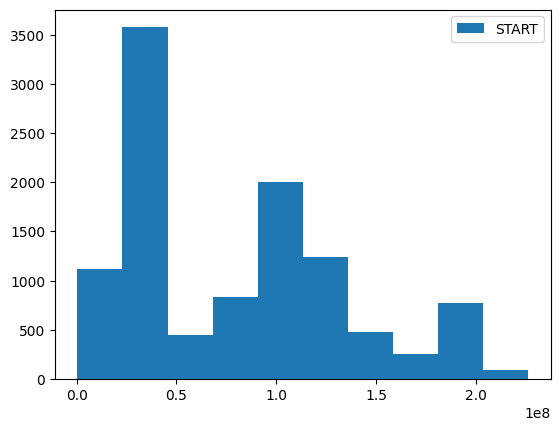

END 4665


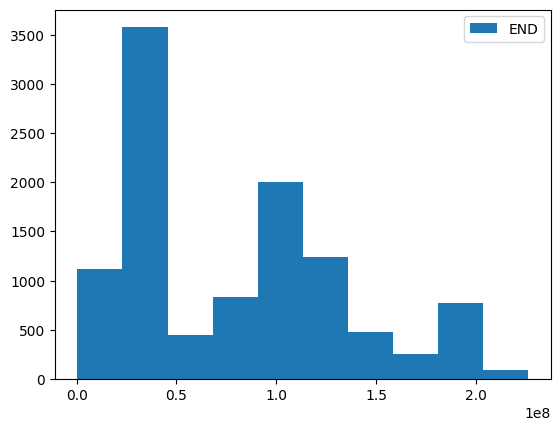

REF 407
ALT 333
GENE 124
PROTEIN_CHANGE 4687
EFFECT 16
VAF 2953


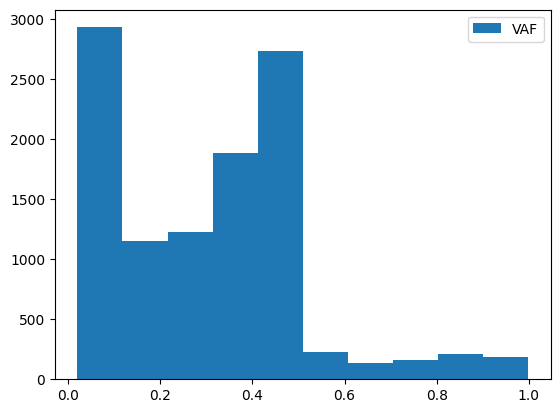

DEPTH 2269


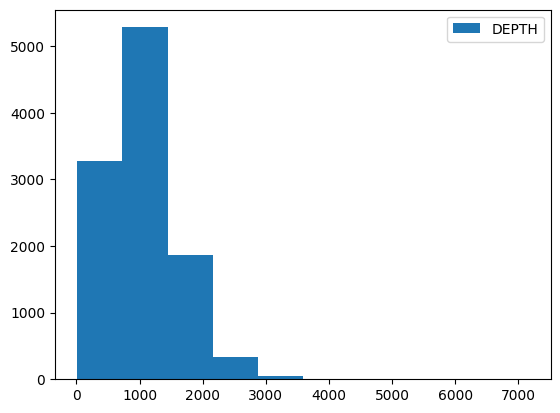

In [51]:
for c in traindataset.columns:
    print(c, traindataset[c].n_unique())
    if traindataset[c].dtype == pl.Float64:
        plt.hist(traindataset[c], label=c)
        plt.legend()
        plt.show()

ID 3026
CHR 24
START 4646


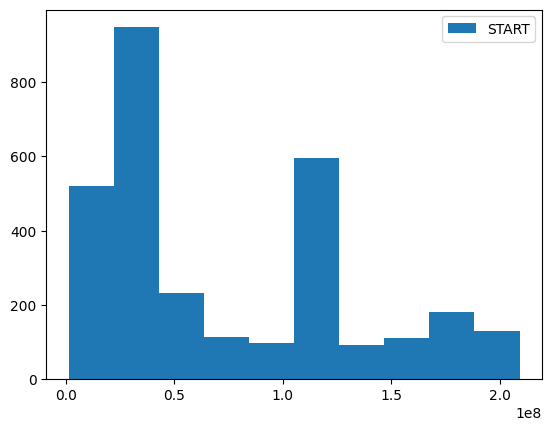

END 4665


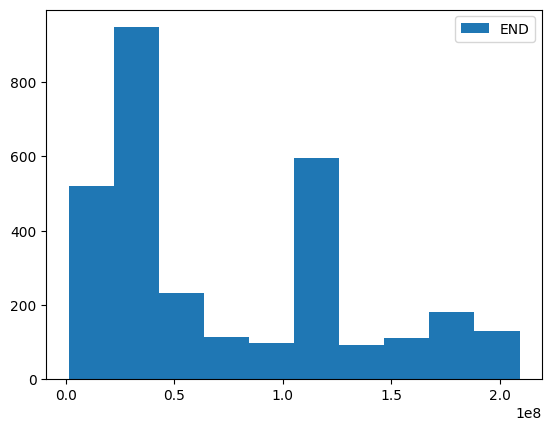

REF 407
ALT 333
GENE 124
PROTEIN_CHANGE 4687
EFFECT 16
VAF 2953


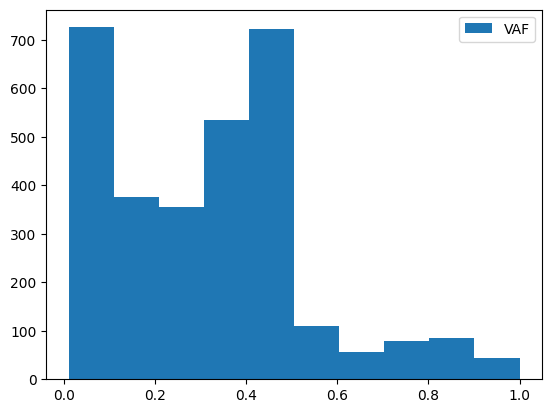

DEPTH 2269


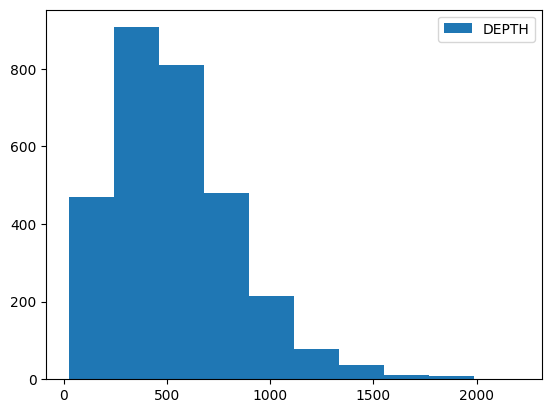

In [52]:
for c in testdataset.columns:
    print(c, traindataset[c].n_unique())
    if testdataset[c].dtype == pl.Float64:
        plt.hist(testdataset[c], label=c)
        plt.legend()
        plt.show()